         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: 

C:\Users\PC\AppData\Local\Temp\ipykernel_12484\2228035358.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


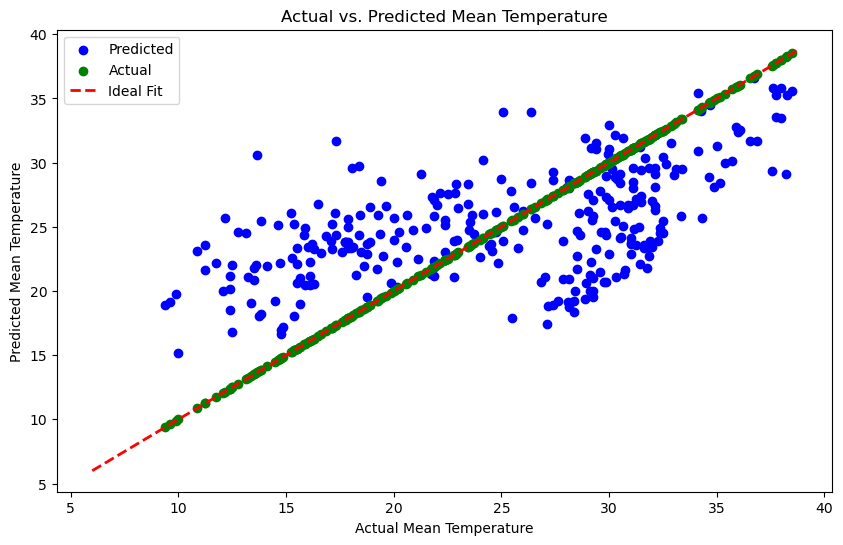

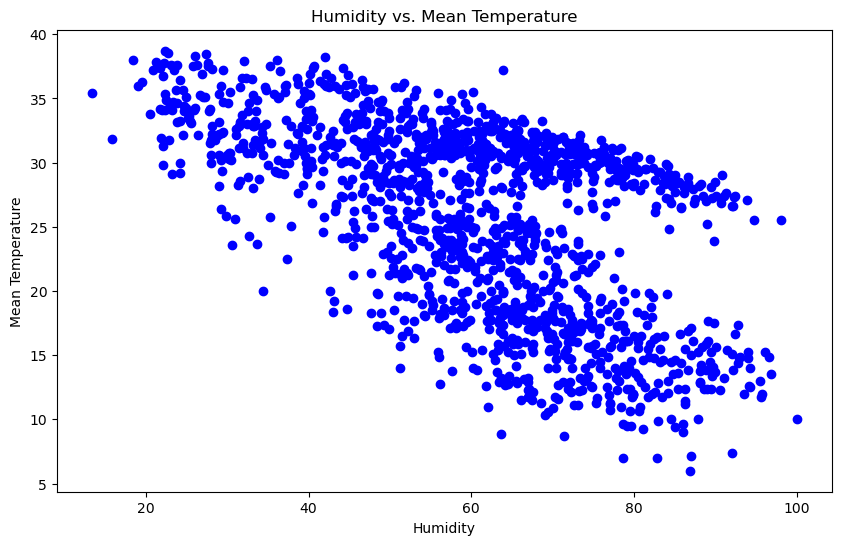

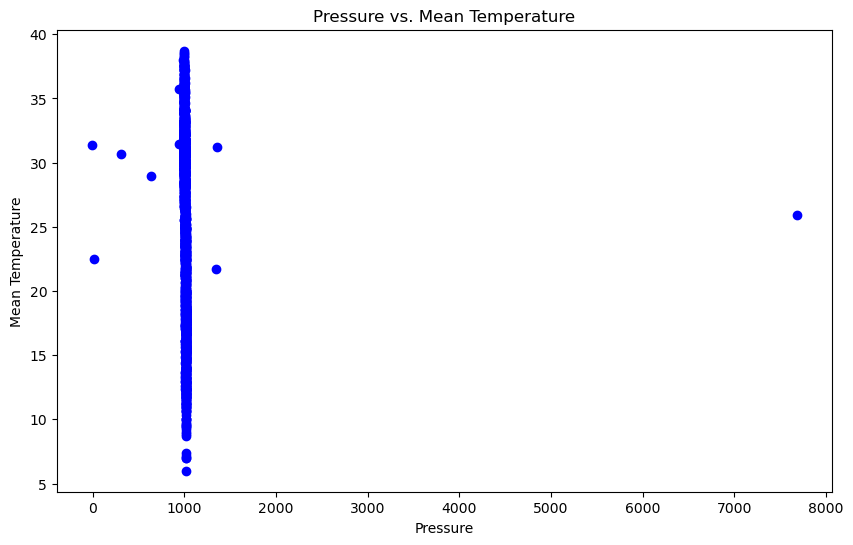

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Load the data
data = pd.read_csv('DailyDelhiClimateTrain.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Extract features and target variable
X = data.drop(['date', 'meantemp'], axis=1)  # Drop 'date' and use 'meantemp' as the target variable
y = data['meantemp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the trained model
joblib.dump(model, 'climate_model.pkl')

# Example input values for prediction
humidity_value = 50.0  # Replace with the actual humidity value
wind_speed_value = 2.0  # Replace with the actual wind speed value
meanpressure_value = 1010.0  # Replace with the actual mean pressure value

# Predict a new sample
new_sample = [[humidity_value, wind_speed_value, meanpressure_value]]
prediction = model.predict(new_sample)
print(f'Predicted Mean Temperature: {prediction[0]}')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='green', label='Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Mean Temperature')
plt.ylabel('Predicted Mean Temperature')
plt.title('Actual vs. Predicted Mean Temperature')
plt.legend()
plt.show()

# Plot Humidity vs. Mean Temperature
plt.figure(figsize=(10, 6))
plt.scatter(data['humidity'], data['meantemp'], color='blue')
plt.xlabel('Humidity')
plt.ylabel('Mean Temperature')
plt.title('Humidity vs. Mean Temperature')
plt.show()

# Plot Pressure vs. Mean Temperature
plt.figure(figsize=(10, 6))
plt.scatter(data['meanpressure'], data['meantemp'], color='blue')
plt.xlabel('Pressure')
plt.ylabel('Mean Temperature')
plt.title('Pressure vs. Mean Temperature')
plt.show()

